## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the datasets

In [2]:
from sqlalchemy import create_engine

In [3]:
SERVER = 'DESKTOP-K4PBESE'
DATABASE = 'Sales'
DRIVER = 'ODBC Driver 17 for SQL Server'
DATABASE_CONNECTION = f'mssql://@{SERVER}/{DATABASE}?driver={DRIVER}'

In [4]:
engine = create_engine(DATABASE_CONNECTION)
conn = engine.connect()
df = pd.read_sql_query('SELECT * FROM [dbo].[SupermarketSalesData]',conn)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Urban,Grocery Store,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Rural,Supermarket,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Urban,Grocery Store,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Rural,Convenience Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Rural,Grocery Store,994.7052


In [268]:
newdata_df = pd.read_csv('data/NewData.csv')

In [269]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [270]:
# statistical info
newdata_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [271]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [272]:
# datatype of attributes
newdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [273]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Data Preprocessing

In [274]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [275]:
# check for null values
newdata_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [276]:
df.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Urban,Grocery Store
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Rural,Supermarket
2,FDN15,Low Fat,Meat,OUT049,Medium,Urban,Grocery Store
3,FDX07,Regular,Fruits and Vegetables,OUT010,None,Rural,Convenience Store
4,NCD19,Low Fat,Household,OUT013,Large,Rural,Grocery Store
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Large,Rural,Grocery Store
8519,FDS36,Regular,Baking Goods,OUT045,None,Suburban,Grocery Store
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Suburban,Grocery Store
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Rural,Supermarket


In [5]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [6]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [7]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Rural       3350
Suburban    2785
Urban       2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Grocery Store        5577
Convenience Store    1083
Hypermart             935
Supermarket           928
Name: Outlet_Type, dtype

In [280]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(newdata_df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    1862
Small     1592
Large      621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Rural       2233
Suburban    1856
Urban       1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Grocery Store        3717
Convenience Store     722
Hypermart             624
Supermarket           618
Name: Outlet_Type, dtype: int64



In [5]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [6]:
null_weight = df['Item_Weight'].isnull()
null_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [10]:
newdata_null_weight = newdata_df['Item_Weight'].isnull()
newdata_null_weight

NameError: name 'newdata_df' is not defined

In [7]:
for i, item in enumerate(df['Item_Identifier']):
    if null_weight[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [285]:
for i, item in enumerate(newdata_df['Item_Identifier']):
    if newdata_null_weight[i]:
        if item in item_weight_mean:
            newdata_df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            newdata_df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [286]:
df['Item_Weight'].isnull().sum()

0

In [287]:
newdata_df['Item_Weight'].isnull().sum()

0

In [8]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Convenience Store,Grocery Store,Hypermart,Supermarket
Outlet_Size,Small,Small,Medium,Medium


In [9]:
null_outlet_size = df['Outlet_Size'].isnull()
df.loc[null_outlet_size, 'Outlet_Size'] = df.loc[null_outlet_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [290]:
null_outlet_size = newdata_df['Outlet_Size'].isnull()
newdata_df.loc[null_outlet_size, 'Outlet_Size'] = newdata_df.loc[null_outlet_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [291]:
df['Outlet_Size'].isnull().sum()

0

In [292]:
newdata_df['Outlet_Size'].isnull().sum()

0

In [293]:
df[df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Rural,Convenience Store,732.3800
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,Large,Rural,Grocery Store,994.7052
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Rural,Supermarket,556.6088
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Urban,Grocery Store,1516.0266
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Rural,Supermarket,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.857645,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Urban,Convenience Store,459.4020
8484,DRJ49,6.865000,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,Large,Rural,Grocery Store,2324.9736
8486,FDR20,20.000000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Rural,Convenience Store,45.2744
8494,NCI54,15.200000,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Suburban,Grocery Store,1637.8680


In [10]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [295]:
# replace zeros with mean
newdata_df.loc[:, 'Item_Visibility'].replace([0], [newdata_df['Item_Visibility'].mean()], inplace=True)

In [296]:
sum(df['Item_Visibility']==0)

0

In [297]:
sum(newdata_df['Item_Visibility']==0)

0

In [11]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [299]:
# combine item fat content
newdata_df['Item_Fat_Content'] = newdata_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
newdata_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### Outlier Detection


In [300]:
# #ZScore
# from scipy.stats import zscore
# df['zscore_Item_MRP'] = np.abs(zscore(df['Item_MRP']))
# df[df['zscore_Item_MRP'] >= 3]

In [301]:
# df['zscore_Item_Outlet_Sales'] = zscore(df['Item_Outlet_Sales'])
# df[df['zscore_Item_MRP'] >= 3]

## Feature Engineering

In [302]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [12]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [304]:
newdata_df['New_Item_Type'] = newdata_df['Item_Identifier'].apply(lambda x: x[:2])
newdata_df['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [13]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumables', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food               6125
Non-Consumables    1599
Drinks              799
Name: New_Item_Type, dtype: int64

In [306]:
newdata_df['New_Item_Type'] = newdata_df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumables', 'DR':'Drinks'})
newdata_df['New_Item_Type'].value_counts()

Food               4076
Non-Consumables    1087
Drinks              518
Name: New_Item_Type, dtype: int64

In [14]:
df.loc[df['New_Item_Type']=='Non-Consumables', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [308]:
newdata_df.loc[newdata_df['New_Item_Type']=='Non-Consumables', 'Item_Fat_Content'] = 'Non-Edible'
newdata_df['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [15]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [310]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [311]:
# create small values for establishment year
newdata_df['Outlet_Years'] = 2013 - newdata_df['Outlet_Establishment_Year']

In [16]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [313]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Urban,Grocery Store,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Rural,Supermarket,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Urban,Grocery Store,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Rural,Convenience Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,Large,Rural,Grocery Store,994.7052,Non-Consumables,26


## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

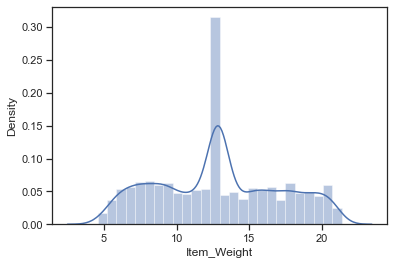

In [314]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

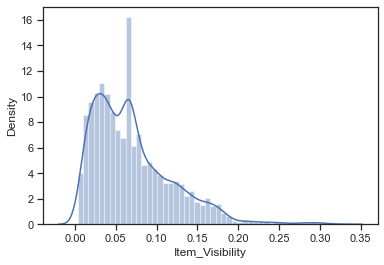

In [315]:
sns.distplot(df['Item_Visibility'])

In [316]:
# log transformation to normalise ()
df['Item_Visibility'] = np.log(1+df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

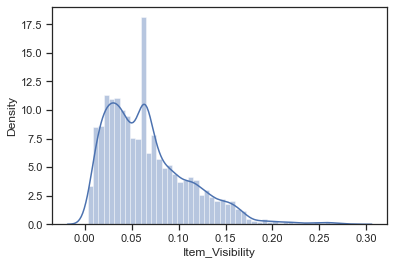

In [317]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

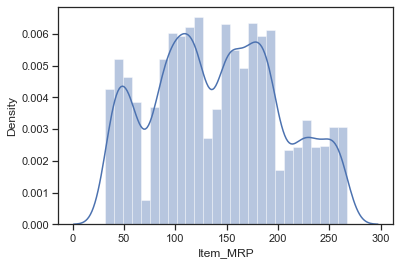

In [318]:
sns.distplot(df['Item_MRP'])

#### Feature Engineering

In [17]:
MRP_category = pd.cut(df['Item_MRP'], bins=[0,70,130,210,300],labels=['Cheap','Medium','High','Expensive'])
df.insert(5,'MRP_Category',MRP_category)

In [320]:
#Since there are 4 peaks  - 
#an indication that a new category can be created with that range and it can give a performance boost
MRP_category = pd.cut(newdata_df['Item_MRP'], bins=[0,70,130,210,300],labels=['Cheap','Medium','High','Expensive'])
newdata_df.insert(5,'MRP_Category',MRP_category)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

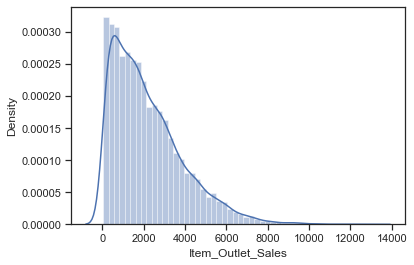

In [248]:
sns.distplot(df['Item_Outlet_Sales'])

In [18]:
# log transformation to normalise ()
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

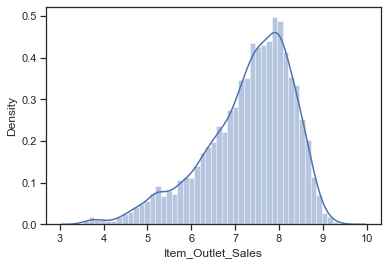

In [250]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

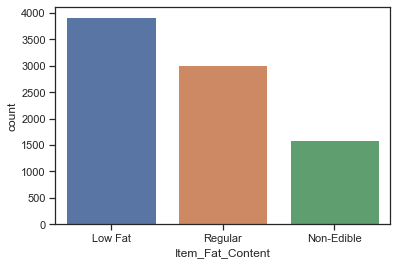

In [251]:
sns.countplot(df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

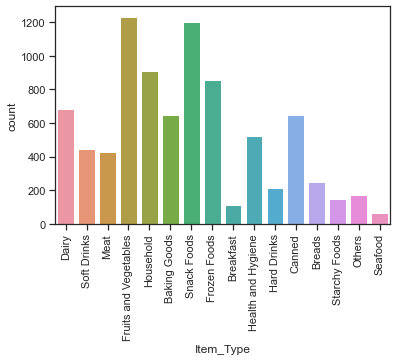

In [252]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

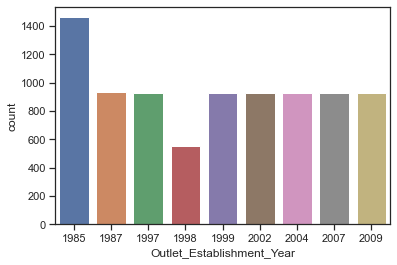

In [253]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

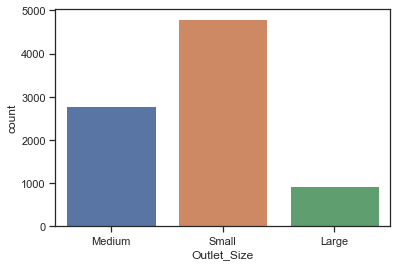

In [254]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

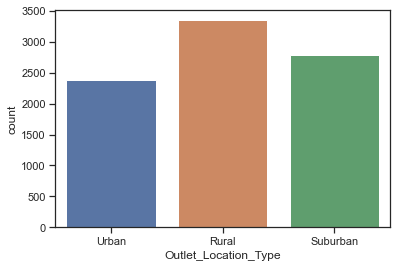

In [255]:
sns.countplot(df['Outlet_Location_Type'])

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket'),
 Text(2, 0, 'Convenience Store'),
 Text(3, 0, 'Hypermart')]

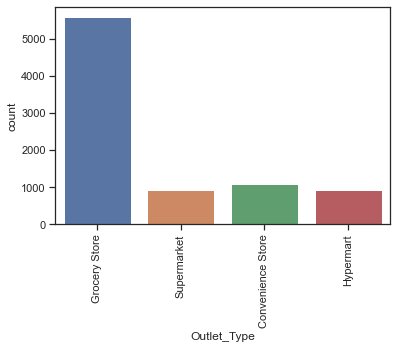

In [256]:
l = list(df['Outlet_Type'].unique())
chart = sns.countplot(df["Outlet_Type"])
chart.set_xticklabels(labels=l, rotation=90)

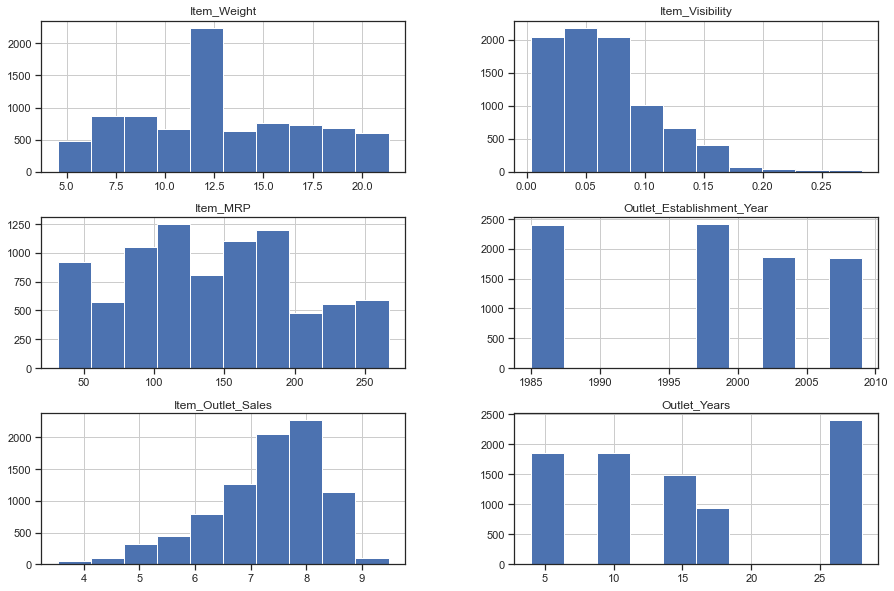

In [257]:
df.hist(figsize=(15,10))
plt.show()

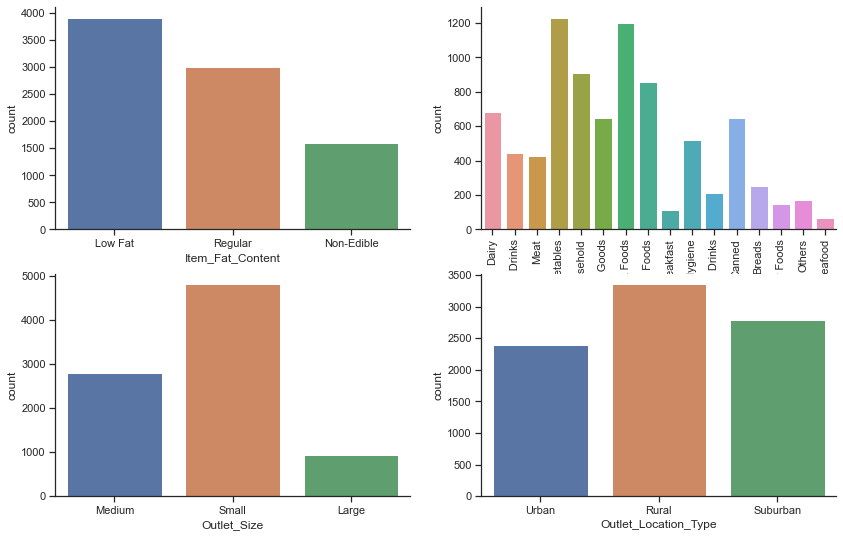

In [258]:
features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type']


plt.figure(figsize=(14, 9))
sns.set(font_scale= 1)
sns.set_style('ticks')

for i, feature in enumerate(features):
    item_type_list = list(df[feature].unique())
    plt.subplot(2, 2, i+1)
    chart = sns.countplot(data=df, x=feature)
    if len(item_type_list) > 6 :
        chart.set_xticklabels(labels= item_type_list, rotation=90)
    
sns.despine()

### Bivariate Analysis

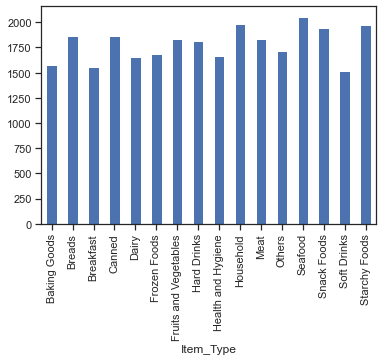

In [324]:
#Relationship between Item_Type and Item_Outlet_Sales
df.groupby('Item_Type')['Item_Outlet_Sales'].median().plot.bar()
plt.show()

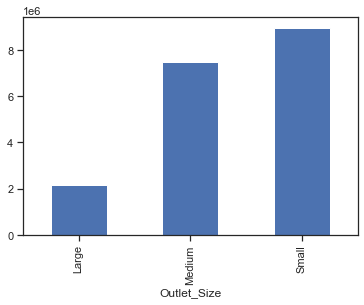

In [332]:
#Relationship between Outlet_Size and Item_Outlet_Sales
df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot.bar()
plt.show()

In [335]:
small_outlets = df[df['Outlet_Size'] == 'Small']
medium_outlets = df[df['Outlet_Size'] == 'Medium']
large_outlets = df[df['Outlet_Size'] == 'Large']

In [339]:
from scipy.stats import ttest_ind
ttest_ind(small_outlets['Item_Outlet_Sales'], medium_outlets['Item_Outlet_Sales'], \
           nan_policy='omit')

Ttest_indResult(statistic=-20.357319855124683, pvalue=9.651670480495541e-90)

In [340]:
from scipy.stats import ttest_ind
ttest_ind(small_outlets['Item_Outlet_Sales'], large_outlets['Item_Outlet_Sales'], \
           nan_policy='omit')

Ttest_indResult(statistic=-7.709878368149455, pvalue=1.4753529648466095e-14)

The mean sales of the sizes of the outlet is statistically different because p value < 0.05

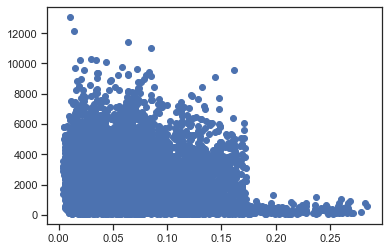

In [330]:
#Relationship between Outlet_Size and Item_Outlet_Sales
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])

In [333]:
df['Item_Visibility'].corr(df['Item_Outlet_Sales'])

-0.13147298872825494

In [69]:
#Relationship between Outlet_Size and Outlet_Location_Type
pd.crosstab(df.Outlet_Size, df.Outlet_Location_Type)

Outlet_Location_Type,Rural,Suburban,Urban
Outlet_Size,,,
Large,932,0,0
Medium,1863,0,930
Small,555,2785,1458


In [341]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.Outlet_Size, df.Outlet_Location_Type))

(4806.778592709207,
 0.0,
 4,
 array([[ 366.32641089,  304.54300129,  261.13058782],
        [1097.8000704 ,  912.64871524,  782.55121436],
        [1885.87351871, 1567.80828347, 1344.31819782]]))

In [70]:
#Relationship between Outlet_Size and Outlet_Type
pd.crosstab(df.Outlet_Size, df.Outlet_Type)

Outlet_Type,Convenience Store,Grocery Store,Hypermart,Supermarket
Outlet_Size,,,,
Large,0,932,0,0
Medium,0,930,935,928
Small,1083,3715,0,0


In [71]:
#Relationship between Outlet_Location_Type and Outlet_Type
pd.crosstab(df.Outlet_Type, df.Outlet_Location_Type)

Outlet_Location_Type,Rural,Suburban,Urban
Outlet_Type,,,
Convenience Store,555,0,528
Grocery Store,932,2785,1860
Hypermart,935,0,0
Supermarket,928,0,0


In [72]:
pd.crosstab(df.Outlet_Size, [df.Outlet_Location_Type, df.Outlet_Type])

Outlet_Location_Type             Rural                                      \
Outlet_Type          Convenience Store Grocery Store Hypermart Supermarket   
Outlet_Size                                                                  
Large                                0           932         0           0   
Medium                               0             0       935         928   
Small                              555             0         0           0   

Outlet_Location_Type      Suburban             Urban                
Outlet_Type          Grocery Store Convenience Store Grocery Store  
Outlet_Size                                                         
Large                            0                 0             0  
Medium                           0                 0           930  
Small                         2785               528           930

Text(0.5, 1.0, 'Sales by Location and Type of Outlets')

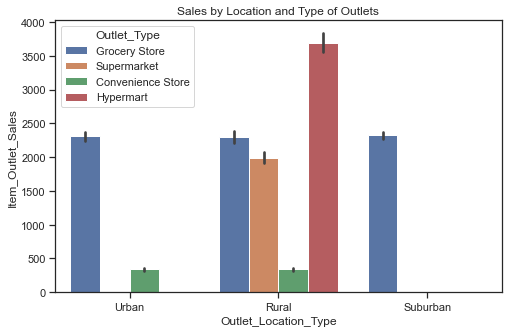

In [350]:
#Sales by Location and OUtlet Type
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df, hue='Outlet_Type')
plt.title("Sales by Location and Type of Outlets")

Text(0.5, 1.0, 'Sales by Location and Type of Outlets')

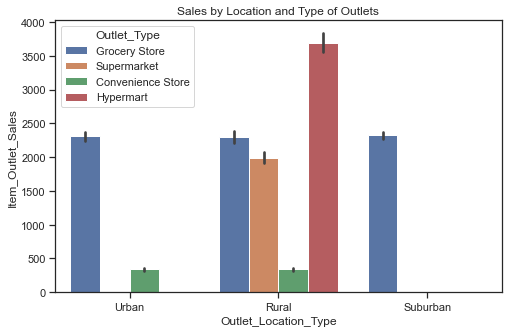

In [350]:
#Sales by Location and OUtlet Type
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df, hue='Outlet_Type')
plt.title("Sales by Location and Type of Outlets")

Text(0.5, 1.0, 'Sales by Location and Size of Outlets')

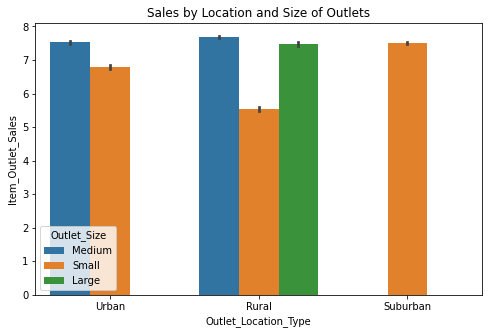

In [19]:
# Sales by OUtlet Size and Location
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df, hue='Outlet_Size')
plt.title("Sales by Location and Size of Outlets")

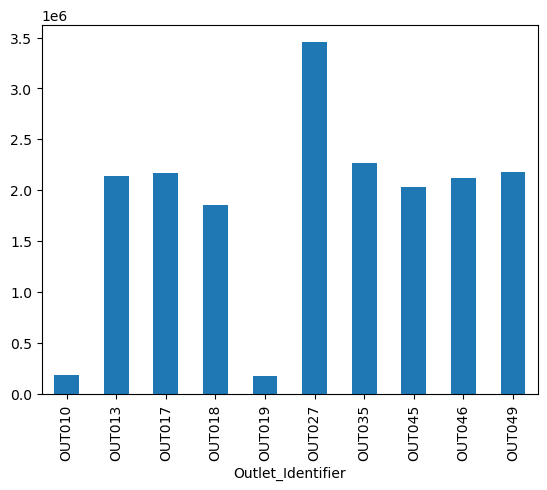

In [25]:
#Sales per outlet
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().plot.bar()
plt.show()

<AxesSubplot:label='e217bd2a-2005-4ac6-80c8-7e86d44508a6', xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

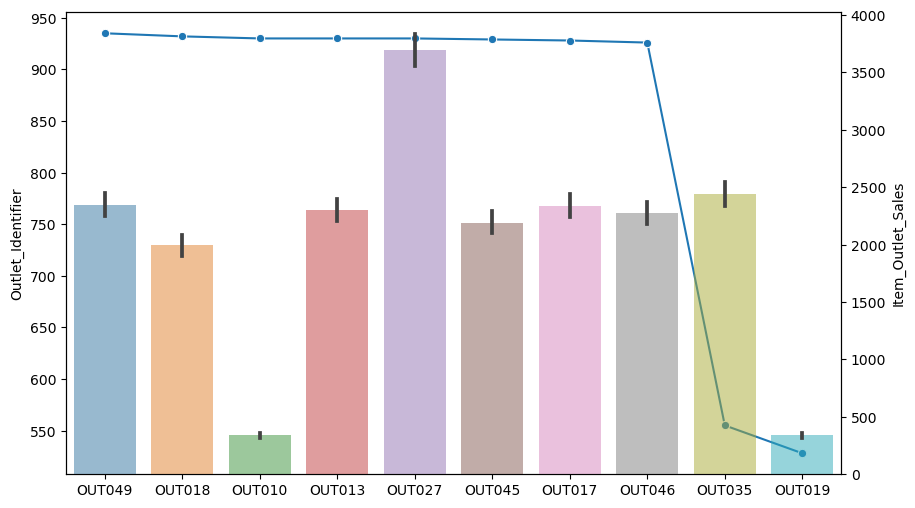

In [27]:
# Relationship between number of items sold per outlet and sales
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(data = df['Outlet_Identifier'].value_counts(), marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x='Outlet_Identifier', y='Item_Outlet_Sales', alpha=0.5, ax=ax2)

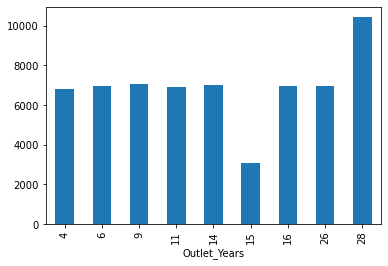

In [20]:
#Relationship between outlet length and sales
#Sales per outlet
df.groupby('Outlet_Years')['Item_Outlet_Sales'].sum().plot.bar()
plt.show()

## Corelation Matrix



<AxesSubplot:>

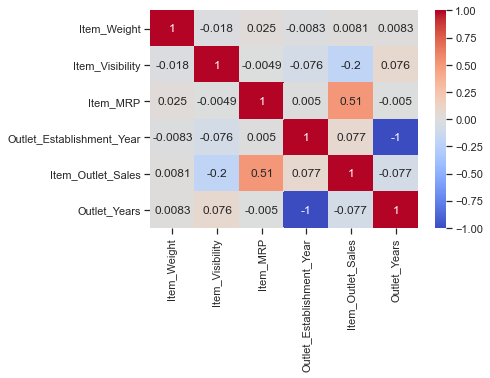

In [73]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [74]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,MRP_Category,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.015920,Dairy,Expensive,249.8092,OUT049,1999,Medium,Urban,Grocery Store,8.225808,Food,14
1,DRC01,5.92,Regular,0.019095,Soft Drinks,Cheap,48.2692,OUT018,2009,Medium,Rural,Supermarket,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016621,Meat,High,141.6180,OUT049,1999,Medium,Urban,Grocery Store,7.648868,Food,14
3,FDX07,19.20,Regular,0.064037,Fruits and Vegetables,High,182.0950,OUT010,1998,Small,Rural,Convenience Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.064037,Household,Cheap,53.8614,OUT013,1987,Large,Rural,Grocery Store,6.903451,Non-Consumables,26


## Label Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type', 'MRP_Category']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [76]:
predicted_sales_df = newdata_df.copy()

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
predicted_sales_df['Outlet'] = le.fit_transform(predicted_sales_df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type', 'MRP_Category']
for col in cat_col:
    predicted_sales_df[col] = le.fit_transform(predicted_sales_df[col])

## Onehot Encoding

In [78]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type','MRP_Category'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,MRP_Category_0,MRP_Category_1,MRP_Category_2,MRP_Category_3
0,FDA15,9.30,0.015920,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019095,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,1,0,0,1,0,0,0
2,FDN15,17.50,0.016621,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.064037,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.064037,9,53.8614,OUT013,1987,6.903451,26,1,...,1,0,0,0,0,1,1,0,0,0


In [79]:
predicted_sales_df = pd.get_dummies(predicted_sales_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type','MRP_Category'])
predicted_sales_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,MRP_Category_0,MRP_Category_1,MRP_Category_2,MRP_Category_3
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,0,1
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,1,0,0,0,1,0,0,0,0,1
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,0,0,0,1,0,1,0,0
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,1,0,0,0,1,0,0,0,1,0
4,FDY38,12.857645,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,1,0,0,1,0,0,1,0,0


In [80]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,MRP_Category_0,MRP_Category_1,MRP_Category_2,MRP_Category_3
0,FDA15,9.30,0.015920,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019095,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,1,0,0,1,0,0,0
2,FDN15,17.50,0.016621,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.064037,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.064037,9,53.8614,OUT013,1987,6.903451,26,1,...,1,0,0,0,0,1,1,0,0,0


### Splitting Data 

In [81]:
# Features and Target Columns for all data after preprocessing
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

### Feature Selection using ExtraTreesRegression

[0.04228383 0.05501954 0.03837702 0.15135738 0.01063798 0.00979598
 0.00710111 0.00262835 0.00706658 0.00145994 0.00276468 0.00303396
 0.00294388 0.00334375 0.00355336 0.4309224  0.00161525 0.02689229
 0.00162588 0.00399889 0.00507614 0.00256502 0.12134839 0.00369001
 0.00644296 0.05445543]


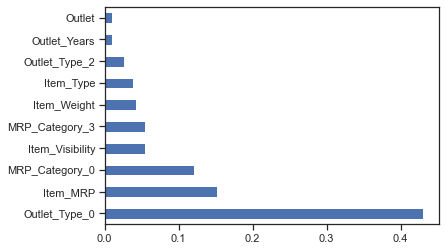

In [83]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [84]:
X_extratrees_fs = df[['Outlet_Type_0', 'Item_MRP', 'MRP_Category_0', 'Item_Visibility']]
y = df['Item_Outlet_Sales']

In [85]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_extratrees_fs, y, test_size=0.2, random_state=1)

### Feature Selection using Select K Best

In [86]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import  f_regression
# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func= f_regression, k=10)
# kbestfeatures = bestfeatures.fit_transform(X,y)
# print(kbestfeatures[:5])
# #dfscores = pd.DataFrame(kbestfeatures.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# #featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# #featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# #print(featureScores.nlargest(10,'Score'))  #print 10 best features

## Dimensionality Reduction with PCA

In [87]:
# Features and Target Columns for all data after PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [88]:
X_train_scaled.mean()

Item_Weight               9.510539e-17
Item_Visibility           1.257916e-16
Item_Type                 1.303307e-17
Item_MRP                  1.266058e-16
Outlet_Years             -3.387011e-17
Outlet                    8.383055e-17
Item_Fat_Content_0        1.157934e-15
Item_Fat_Content_1        2.844926e-16
Item_Fat_Content_2       -4.308668e-17
Outlet_Size_0             1.737309e-16
Outlet_Size_1             2.019179e-18
Outlet_Size_2             5.572284e-17
Outlet_Location_Type_0    1.969677e-16
Outlet_Location_Type_1   -1.403330e-16
Outlet_Location_Type_2   -4.694267e-16
Outlet_Type_0            -3.405330e-16
Outlet_Type_1             1.124878e-16
Outlet_Type_2            -1.673314e-16
Outlet_Type_3            -3.258369e-17
New_Item_Type_0           7.095136e-16
New_Item_Type_1           7.601234e-17
New_Item_Type_2           2.844926e-16
MRP_Category_0           -4.850590e-16
MRP_Category_1            2.333455e-17
MRP_Category_2            1.190339e-16
MRP_Category_3           

In [89]:
X_train_scaled.var()

Item_Weight               1.000147
Item_Visibility           1.000147
Item_Type                 1.000147
Item_MRP                  1.000147
Outlet_Years              1.000147
Outlet                    1.000147
Item_Fat_Content_0        1.000147
Item_Fat_Content_1        1.000147
Item_Fat_Content_2        1.000147
Outlet_Size_0             1.000147
Outlet_Size_1             1.000147
Outlet_Size_2             1.000147
Outlet_Location_Type_0    1.000147
Outlet_Location_Type_1    1.000147
Outlet_Location_Type_2    1.000147
Outlet_Type_0             1.000147
Outlet_Type_1             1.000147
Outlet_Type_2             1.000147
Outlet_Type_3             1.000147
New_Item_Type_0           1.000147
New_Item_Type_1           1.000147
New_Item_Type_2           1.000147
MRP_Category_0            1.000147
MRP_Category_1            1.000147
MRP_Category_2            1.000147
MRP_Category_3            1.000147
dtype: float64

In [90]:
from sklearn.decomposition import PCA
n_components = 13
#pca = PCA(0.9)
pca = PCA(n_components = n_components)
pca.fit(X_train_scaled)
X_train_pca = pd.DataFrame(pca.transform(X_train_scaled), index=X_train_scaled.index, \
                          columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled), index=X_test_scaled.index, \
                          columns=["PC" + str(i) for i in range(1, n_components + 1)])
y_train_pca = y_train
y_test_pca = y_test

In [91]:
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
1945,2.694059,3.508879,-0.444815,-1.501348,-2.359901,-1.171633,1.342669,0.592872,-1.300641,-0.968601,-1.026573,0.743941,0.698690
1720,2.713701,3.409753,-0.292282,-1.241916,-2.110625,-1.283343,1.778732,0.585631,-1.465533,-0.900249,-0.961207,0.422134,2.124606
1954,-2.006015,-1.051761,1.565481,-1.838957,-1.187745,-1.328602,-0.429185,-0.938182,0.434544,1.617843,1.034426,-0.302866,-0.292117
1919,2.602365,-0.903875,-1.045339,0.794898,-2.500466,0.186036,1.974592,-1.379574,-0.993184,-1.148825,0.334577,-0.238449,1.645368
2461,-2.182955,-1.005799,0.488559,-0.586836,-0.692184,-1.250176,-0.396318,1.805324,0.500237,-0.291346,0.595615,-1.199290,-0.093382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.015912,-0.961404,1.738504,-0.240710,3.816557,-1.551715,2.933398,1.158117,-0.949730,-0.569074,0.696767,0.122295,2.315109
7813,-0.028645,-1.100098,0.464516,2.576747,3.182867,0.178364,2.953440,-0.111742,-0.789699,1.557175,-1.565337,-0.346990,0.471599
905,-1.611973,-0.869438,-0.848375,-0.888120,1.417338,0.985690,0.236627,0.632085,-0.627723,-0.924456,-1.717046,0.674132,-0.176938
5192,1.123122,3.564216,1.766672,2.893957,0.491292,-1.152387,2.042432,0.308627,-0.165972,1.695147,-0.530943,-0.760955,-1.609908


In [92]:
X_train_pca.var()

PC1     4.047846
PC2     3.113112
PC3     2.310630
PC4     2.238073
PC5     2.137129
PC6     1.955990
PC7     1.868580
PC8     1.472257
PC9     1.311805
PC10    1.287825
PC11    1.145143
PC12    0.990023
PC13    0.839819
dtype: float64

## Training the Models

In [93]:
##Init the DataFrame
data = {'Date' :[],
        'Model': [],
        'RunTime': [],
        'Data Manipulation':[],
        'CV_Score': [],
        'MAE_Score': [],
        'RMSE_Score': [],
        'R^2_Score': [],
        'Adjusted_R2_Score' : [],
        'Training_Score': [],
        'Testing_Score': [],
        'NumTrainingRows': []}
audit_log_df = pd.DataFrame(data=data)

In [94]:
def updateAuditLog(datetime, modelname, training_time, optimization, cv_score, mae, rmse, r2, adj_r2, \
                   training_score, testing_score):
    global audit_log_df
    data = {'Date' : datetime,
            'Model': modelname,
            'RunTime': training_time,
            'Data Manipulation': optimization,
            'CV_Score': cv_score,
            'MAE_Score': mae,
            'RMSE_Score': rmse,
            'R^2_Score': r2,
            'Adjusted_R2_Score' : adj_r2,
            'Training_Score': training_score,
            'Testing_Score': testing_score,
            'NumTrainingRows': X_train.shape[0]}
    audit_log_df = audit_log_df.append(data, ignore_index=True)

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

def train(modelname, model, optimization, X_train, y_train, X_test, y_test):
    # train the model
    model_start_time = datetime.datetime.now()
    model.fit(X_train, y_train)
    model_end_time = datetime.datetime.now()
    training_time = model_end_time - model_start_time
    training_time = training_time.total_seconds() * 1000
    
    # predict the training set
    pred = model.predict(X_test)

    # perform cross-validation
    cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.mean(np.abs(cv_score))
    
    adj_r2 = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    print("Training Score: ", training_score)
    print("Testing Score: ", testing_score)
    #Write to AuditLog dataframe   
    updateAuditLog(model_start_time, modelname, training_time, optimization, cv_score, mean_absolute_error(y_test,pred),\
                   np.sqrt(mean_squared_error(y_test,pred)), r2_score(y_test,pred), adj_r2, \
                   training_score, testing_score)
    

### Linear Regression

In [96]:
#Linear Regression for whole dataset
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
modelname = 'Linear Regressor'
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.7345499919533125
Testing Score:  0.745603274147552


In [97]:
#Linear Regression for whole dataset with feature selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
modelname = 'Linear Regressor'
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.6980203982640586
Testing Score:  0.7167722585043945


In [98]:
#Linear Regression for dataset after PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
modelname = 'Linear Regressor'
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7040516737265097
Testing Score:  0.7255672128401874


### Ridge Regression (L2 Regularization)

In [99]:
model = Ridge(alpha=0.01)
modelname = 'Ridge Regressor'
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.7345497703062909
Testing Score:  0.7456104648182782


In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge()
modelname = 'Ridge Regressor'
train(modelname, model, 'FS', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.6980195762624319
Testing Score:  0.716771483790316


In [101]:
model = Ridge(alpha=5)
modelname = 'Ridge Regressor'
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7040515597354352
Testing Score:  0.7255660783935031


### Lasso Regression (L1 Regularization)

In [102]:
model = Lasso(alpha=50, tol=0.1)
modelname = 'Lasso Regressor'
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.0
Testing Score:  -0.0031783893306709388


In [103]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Lasso()
modelname = 'Lasso Regressor'
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.25698228548986457
Testing Score:  0.2669075734853551


In [104]:
model = Lasso()
modelname = 'Lasso Regressor'
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.0
Testing Score:  -0.0031783893306709388


### DecisionTreeRegressor

In [105]:
from sklearn.tree import DecisionTreeRegressor
modelname = 'Decision Tree Regressor'
model = DecisionTreeRegressor()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  1.0
Testing Score:  0.4992716303738429


In [106]:
from sklearn.tree import DecisionTreeRegressor
modelname = 'Decision Tree Regressor'
model = DecisionTreeRegressor()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.9998908694982609
Testing Score:  0.43111773830236133


In [107]:
from sklearn.tree import DecisionTreeRegressor
modelname = 'Decision Tree Regressor'
model = DecisionTreeRegressor()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  1.0
Testing Score:  0.4989145787638244


### KNeighbors Regressor

In [108]:
from sklearn.neighbors import KNeighborsRegressor
modelname = 'KNeighbors Regressor'
model = KNeighborsRegressor()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.7347079135659222
Testing Score:  0.6075081104700277


In [109]:
modelname = 'KNeighbors Regressor'
model = KNeighborsRegressor()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.7501722074941295
Testing Score:  0.6634504477783764


### SVM Regressor (Linear Kernal)

In [110]:
from sklearn.svm import LinearSVR
modelname = 'SVM Regressor (Linear Kernal)'
model = LinearSVR()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.3403370905765095
Testing Score:  0.3986062661291393


In [111]:
modelname = 'SVM Regressor (Linear Kernal)'
model = LinearSVR()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.6839523466688184
Testing Score:  0.7048851211685464


In [112]:
modelname = 'SVM Regressor (Linear Kernal)'
model = LinearSVR()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7004967591986486
Testing Score:  0.7223794287860752


### SVM Regressor (RBF Kernal)

In [113]:
from sklearn.svm import SVR
modelname = 'SVM Regressor (RBF Kernal)'
model = SVR()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.33442673787756627
Testing Score:  0.3403050657441241


In [114]:
modelname = 'SVM Regressor (RBF Kernal)'
model = SVR()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.26265737958227786
Testing Score:  0.2689907760110226


In [115]:
modelname = 'SVM Regressor (RBF Kernal)'
model = SVR()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7413872531481825
Testing Score:  0.7326023818480694


### RandomForest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor
modelname = 'Random Forest Regressor'
model = RandomForestRegressor()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.9587593509923629
Testing Score:  0.7094916711400432


In [117]:
from sklearn.ensemble import RandomForestRegressor
modelname = 'Random Forest Regressor'
model = RandomForestRegressor()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.9502501548971412
Testing Score:  0.6602237858445585


In [118]:
from sklearn.ensemble import RandomForestRegressor
modelname = 'Random Forest Regressor'
model = RandomForestRegressor()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.9582885019822669
Testing Score:  0.7094378470041192


### XGBoost Regressor

In [119]:
import xgboost
modelname = 'XGBoost Regressor'
model = xgboost.XGBRegressor()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.891678357926958
Testing Score:  0.7013006625712053


In [120]:
import xgboost
modelname = 'XGBoost Regressor'
model = xgboost.XGBRegressor()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.8285428604584165
Testing Score:  0.684540519417195


In [121]:
import xgboost
modelname = 'XGBoost Regressor'
model = xgboost.XGBRegressor()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.9097348115924334
Testing Score:  0.7009441189896866


### Gradient Boosting Regressor

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
modelname = 'Gradient Boosting Regressor'
model = GradientBoostingRegressor()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.7561272026010573
Testing Score:  0.7463801751020813


In [123]:
modelname = 'Gradient Boosting Regressor'
model = GradientBoostingRegressor()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.7208720218593314
Testing Score:  0.7190566221043522


In [124]:
modelname = 'Gradient Boosting Regressor'
model = GradientBoostingRegressor()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7533114767652814
Testing Score:  0.7318759638244612


### Neural Network

In [125]:
from sklearn.neural_network import MLPRegressor
modelname = 'ML Regressor'
model = MLPRegressor()
train(modelname, model, 'None', X_train, y_train, X_test, y_test)

Training Score:  0.7216648876321066
Testing Score:  0.7308205130948064


In [126]:
modelname = 'ML Regressor'
model = MLPRegressor()
train(modelname, model, 'Feature Selection', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.659154510561194
Testing Score:  0.6783495583120914


In [127]:
modelname = 'ML Regressor'
model = MLPRegressor()
train(modelname, model, 'PCA', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7490364555914637
Testing Score:  0.7316561563462803


### Hyperparameter Tuning of XGBoost Regressor (GridSearchCV) (Original Data)


In [128]:
param_grid={
 "learning_rate"    : [0.1,0.01,0.05 ] ,
 "max_depth"        : [ 3,4,5],
 "reg_lambda" : [ 0, 1.0, 10.0 ],
 "gamma"            : [ 0,0.25,1.0],
 "scale_pos_weight" : [ 1,3,5 ]
}

In [129]:
from sklearn.model_selection import GridSearchCV
xgb_gridsearchcv_fe=GridSearchCV(estimator=xgboost.XGBRegressor(),
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              cv=5,
                              verbose=2)
xgb_gridsearchcv_fe.fit(X_train,
                     y_train, 
                     verbose=True)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [130]:
xgb_gridsearchcv_fe.best_params_

{'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [131]:
import xgboost
modelname = 'XGBoost Regressor'
model = xgboost.XGBRegressor(gamma= 1.0,
                             learning_rate= 0.1,
                             max_depth= 4,
                             reg_lambda= 10.0,
                             scale_pos_weight= 1)
train(modelname, model, 'Hyperparameter Tuning', X_train, y_train, X_test, y_test)

Training Score:  0.7517773452012517
Testing Score:  0.746937569836527


### Hyperparameter Tuning of XGBoost Regressor (GridSearchCV) (Data after Feature Selection)

In [132]:
xgb_gridsearchcv_fs=GridSearchCV(estimator=xgboost.XGBRegressor(),
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              cv=5,
                              verbose=2)
xgb_gridsearchcv_fs.fit(X_train_fs,
                     y_train_fs, 
                     verbose=True)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [133]:
xgb_gridsearchcv_fs.best_params_

{'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [134]:
modelname = 'XGBoost Regressor'
model = xgboost.XGBRegressor(gamma= 0,
                             learning_rate= 0.1,
                             max_depth= 3,
                             reg_lambda= 10.0,
                             scale_pos_weight= 1)
train(modelname, model, 'Feature Selection and Hyperparameter Tuning', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.7169914876195174
Testing Score:  0.7213687250258842


### Hyperparameter Tuning of XGBoost Regressor on Data after PCA (GridSearchCV)

In [135]:
from sklearn.model_selection import GridSearchCV
xgb_gridsearchcv_pca=GridSearchCV(estimator=xgboost.XGBRegressor(),
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              cv=5,
                              verbose=2)
xgb_gridsearchcv_pca.fit(X_train_pca,
                     y_train_pca, 
                     verbose=True)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [136]:
xgb_gridsearchcv_pca.best_params_

{'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [137]:
model = xgboost.XGBRegressor(gamma= 1,
                             learning_rate= 0.1,
                             max_depth= 3,
                             reg_lambda= 10.0,
                             scale_pos_weight= 1)
train(modelname, model, 'PCA and Hyperparameter Tuning', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7466280871613844
Testing Score:  0.7316910234109424


### Hyperparameter Tuning of Gradient Boosting Regressor (RandomSearchCV) (Original Data)

In [138]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [139]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [140]:
from sklearn.model_selection import RandomizedSearchCV
gb = GradientBoostingRegressor()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                                  n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)

In [141]:
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [142]:
gb_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
modelname = 'Gradient Boosting Regressor'
model = GradientBoostingRegressor(n_estimators=100,
                                  min_samples_split=100,
                                  min_samples_leaf= 5,
                                  max_features='sqrt',
                                  max_depth=5)
train(modelname, model, 'Hyperparameter Tuning', X_train, y_train, X_test, y_test)

Training Score:  0.7668602873203054
Testing Score:  0.7446681824556183


### Hyperparameter Tuning of Ridge Regressor

In [144]:
from sklearn.linear_model import Ridge


ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [145]:

ridge_regressor.best_score_

-0.27051835163252413

In [146]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

### Hyperparameter Tuning of Random Forest Regressor(GridSearchCV)

In [147]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

In [148]:
# # Create the random grid
# rf_param_grid  = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

# print(rf_param_grid)

In [149]:
# rf = RandomForestRegressor()
# rf_gridsearchcv = GridSearchCV(estimator = rf, param_grid  = rf_param_grid, \
#                                scoring='r2', cv = 5,
#                                verbose=2, n_jobs=-1)

# rf_gridsearchcv.fit(X_train,y_train)

In [150]:

# rf_gridsearchcv.best_params_

In [151]:
# rf_gridsearchcv.best_score_

In [152]:
# predictions=rf_gridsearchcv.predict(X_test)

In [153]:
# sns.distplot(y_test-predictions)

### Hyperparameter Tuning of Random Forest Regressor on data after Principle Component Analysis

In [154]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

In [155]:
# # Create the random grid
# rf_param_grid  = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

# print(rf_param_grid)

In [156]:
# from sklearn.model_selection import GridSearchCV
# rf = RandomForestRegressor()
# rf_gridsearchcv_on_pca_data = GridSearchCV(estimator = rf, param_grid  = rf_param_grid, \
#                                scoring='r2', cv = 5,
#                                verbose=2, n_jobs=-1)

# rf_gridsearchcv_on_pca_data.fit(X_train_pca,y_train_pca)

In [157]:
# rf_gridsearchcv_on_pca_data.best_params_

In [158]:
# rf_gridsearchcv_on_pca_data.best_score_

In [159]:
# predictions=rf_gridsearchcv_on_pca_data.predict(X_test_pca)

In [160]:
# rf_random_training_score = rf_gridsearchcv_on_pca_data.score(X_train, y_train)
# rf_random_testing_score = rf_gridsearchcv_on_pca_data.score(X_test, y_test)

### Hyperparameter Tuning of Random Forest Regressor  (RandomizedSearchCV) (Original Data)

In [161]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [162]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [163]:

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random_fe = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                                  n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)

In [164]:
rf_random_fe.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [165]:
rf_random_fe.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [166]:
modelname = 'Random Forest Regressor'
model = RandomForestRegressor(n_estimators=300,
                              min_samples_split=100,
                              min_samples_leaf=5 ,
                              max_features='auto',
                              max_depth=15)
train(modelname, model, 'Hyperparameter Tuning', X_train, y_train, X_test, y_test)

Training Score:  0.7672939555264643
Testing Score:  0.7402363471284836


### Hyperparameter Tuning of Random Forest Regressor (RandomizedSearchCV) (Feature Selection)

In [167]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [168]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [169]:
rf = RandomForestRegressor()
rf_random_fs = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                                  n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)

In [170]:
rf_random_fs.fit(X_train_fs,y_train_fs)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [171]:
rf_random_fs.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [172]:
modelname = 'Random Forest Regressor'
model = RandomForestRegressor(n_estimators=700,
                              min_samples_split=10,
                              min_samples_leaf= 2,
                              max_features='sqrt',
                              max_depth=5)
train(modelname, model, 'Feature Selection and Hyperparameter Tuning', X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Training Score:  0.71037493789581
Testing Score:  0.7215175047906368


### Hyperparameter Tuning of Random Forest Regressor (RandomizedSearchCV) (PCA)

In [173]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [174]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [175]:
rf = RandomForestRegressor()
rf_random_pca = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                                  n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)

In [176]:
rf_random_pca.fit(X_train_pca,y_train_pca)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [177]:
rf_random_pca.best_params_ 

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [178]:
modelname = 'Random Forest Regressor'
model = RandomForestRegressor(n_estimators=900,
                              min_samples_split=5,
                              min_samples_leaf= 5,
                              max_features='sqrt',
                              max_depth=10)
train(modelname, model, 'PCA and Hyperparameter Tuning', X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Training Score:  0.7814349420897586
Testing Score:  0.7324644458970946


### Predicting Sales from Unseen data

In [179]:
predicted_sales_X = predicted_sales_df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])

In [180]:
#predicted_sales_X = scaler.fit_transform(predicted_sales_X)
# Features and Target Columns for all data after PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(predicted_sales_X)
predicted_sales_X_scaled = pd.DataFrame(scaler.transform(predicted_sales_X), index=predicted_sales_X.index, \
                                        columns=predicted_sales_X.columns)


In [181]:

n_components = 13
pca = PCA(n_components = n_components)
pca.fit(predicted_sales_X_scaled)
predicted_sales_X_pca = pd.DataFrame(pca.transform(predicted_sales_X_scaled), index=predicted_sales_X_scaled.index, \
                          columns=["PCA" + str(i) for i in range(1, n_components + 1)])

In [184]:
predicted_sales = model.predict(predicted_sales_X_pca)

In [185]:
predicted_sales = np.exp(predicted_sales) -1

In [186]:
 newdata_df['Predicted_Sales'] = predicted_sales

In [187]:
#Write to sql db
newdata_df.to_sql('PredictedSales', engine, if_exists='replace', index=False)

In [189]:
audit_log_df.head()


,Date,Model,RunTime,Data Manipulation,CV_Score,MAE_Score,RMSE_Score,R^2_Score,Adjusted_R2_Score,Training_Score,Testing_Score,NumTrainingRows
0,2021-11-21 09:30:47.532502,Linear Regressor,9.973,None,0.270522,0.411764,0.529540,0.745603,0.733534,0.734550,0.745603,6818.0
1,2021-11-21 09:30:47.609938,Linear Regressor,3.989,Feature Selection,0.306194,0.438861,0.558741,0.716772,0.697843,0.698020,0.716772,6818.0
2,2021-11-21 09:30:47.672936,Linear Regressor,4.987,PCA,0.301044,0.432976,0.549997,0.725567,0.703486,0.704052,0.725567,6818.0
3,2021-11-21 09:30:47.736765,Ridge Regressor,5.986,None,0.270518,0.411764,0.529532,0.745610,0.733533,0.734550,0.745610,6818.0
4,2021-11-21 09:30:47.800594,Ridge Regressor,2.993,FS,0.306168,0.438902,0.558742,0.716771,0.697842,0.698020,0.716771,6818.0


In [188]:
audit_log_df.to_sql('AuditLog', engine, if_exists='replace', index=False)